In [1]:
# imorting packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep


/home/marcos/.pyenv/versions/3.12.9/envs/aluno/lib/python3.12/site-packages/earthpy/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [24]:
# get data and set working directory
# et.data.get_data("colorado-flood")  already downloaded. uncoment only if a new download is necessary

# set wkdir
os.chdir(os.path.join(et.io.HOME, "aluno", "python", "earth-analytics", "data"))


## Open DTM raster data using Rioxarry

`lidar_dtm = rxr.open_raterio(lidar_dem_path, masked=True`

`rxr.open_rasterio` - rxr is the alias for rioxarray
`masked=True` - will mask all `nodata` values in our array. this means that they will not be plotted or included in calculations

In [7]:
lidar_dtm_path = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd", "pre-flood", "lidar", "pre_DTM.tif")
lidar_dtm_path

'colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'

In [8]:
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [9]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

In [10]:
lidar_dtm.values


array([[[      nan,       nan,       nan, ..., 1695.63  , 1695.4199,
         1695.4299],
        [      nan,       nan,       nan, ..., 1695.6   , 1695.5399,
         1695.36  ],
        [      nan,       nan,       nan, ..., 1695.38  , 1695.44  ,
         1695.37  ],
        ...,
        [      nan,       nan,       nan, ..., 1681.45  , 1681.39  ,
         1681.25  ],
        [      nan,       nan,       nan, ..., 1681.72  , 1681.57  ,
         1681.5599],
        [      nan,       nan,       nan, ..., 1681.89  , 1681.8099,
         1681.74  ]]], shape=(1, 2000, 4000), dtype=float32)

In [11]:
lidar_dtm.shape

(1, 2000, 4000)

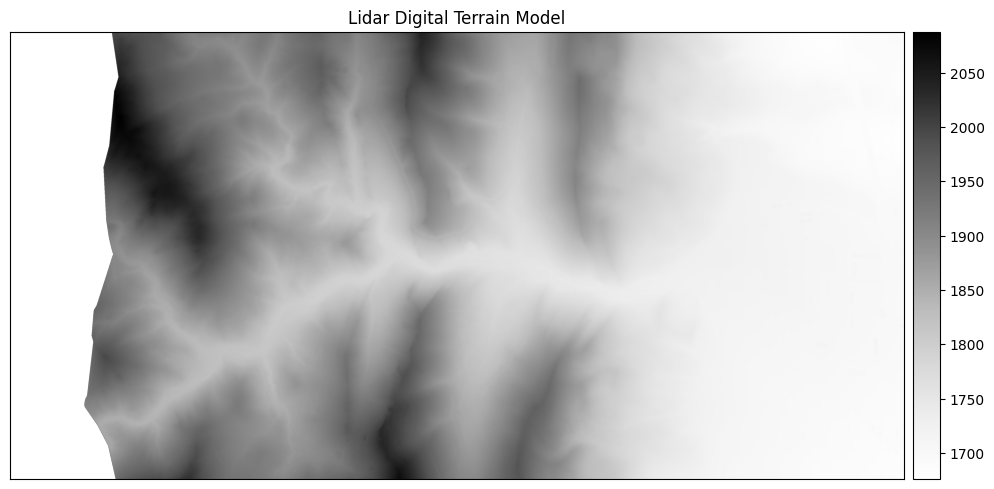

In [13]:
ep.plot_bands(
    lidar_dtm,
    scale=False,
    cmap='Greys',
    title='Lidar Digital Terrain Model'
)
plt.show()


In [20]:
lidar_dem_path_post_flood = os.path.join(
    "colorado-flood", "spatial", "boulder-leehill-rd", "post-flood", "lidar", "post_DTM.tif"
)
lidar_flood_dtm = rxr.open_rasterio(lidar_dem_path_post_flood, masked=True)
lidar_flood_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

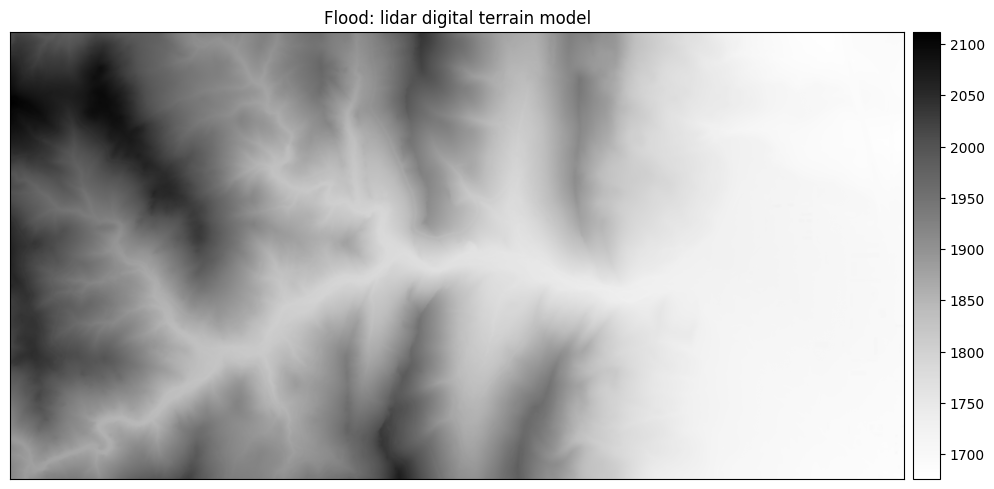

In [22]:
ep.plot_bands(lidar_flood_dtm, scale=False, cmap='Greys', title='Flood: lidar digital terrain model')
plt.show()

## Open Imagery raster data

Another type of raster data that you see is imagery. Below we will download and open some National Agriculture Image Program - NAIP data that were collected before a fire that occureed close to Nederland, Colorado

In [23]:
# downloading naip data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

Extracted output to /home/marcos/earth-analytics/data/earthpy-downloads/naip-before-after


'/home/marcos/earth-analytics/data/earthpy-downloads/naip-before-after'

In [28]:
# open image
naip_pre_fire_path = os.path.join("naip-before-after", "pre-fire", "crop", "m_3910505_nw_13_1_20150919_crop.tif")
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)
naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 81MB
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

## plot multiple bands image

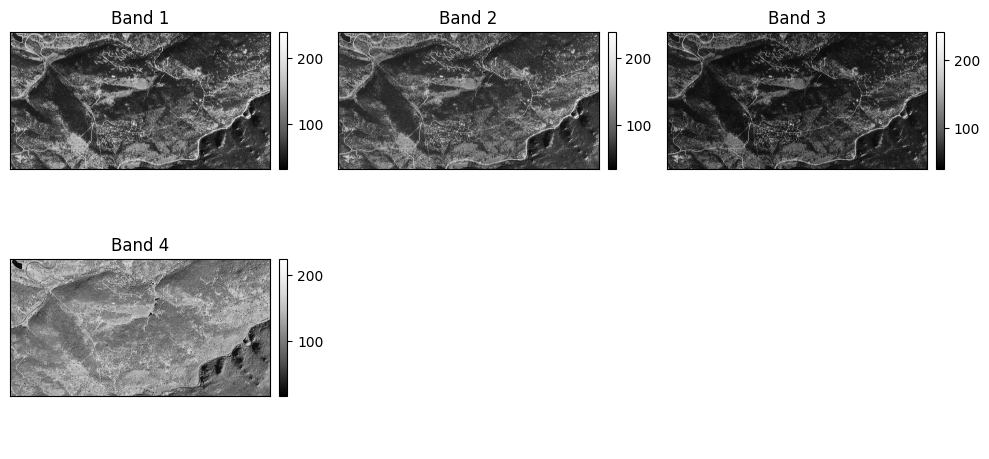

In [30]:
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

## plot color image

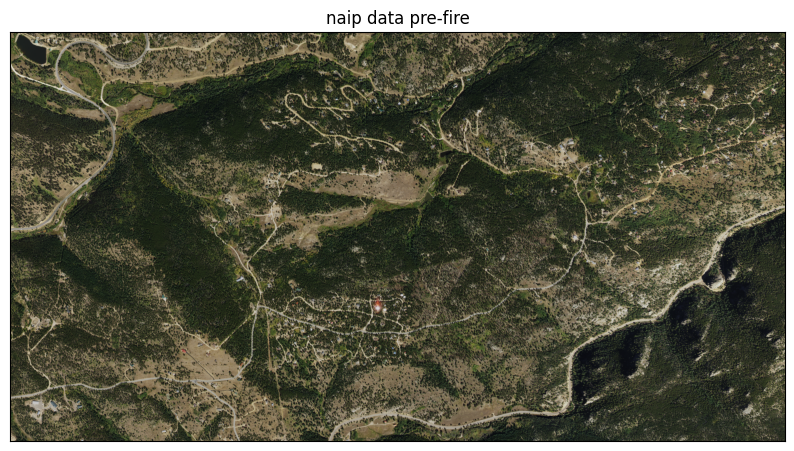

In [31]:
ep.plot_rgb(naip_pre_fire.values, title='naip data pre-fire')
plt.show()

In [33]:
# post fire data
naip_post_fire_path = os.path.join("naip-before-after", "post-fire", "crop", "m_3910505_nw_13_1_20170902_crop.tif")
naip_post_fire = rxr.open_rasterio(naip_post_fire_path)
naip_post_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 81MB
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  234
    STATISTICS_MEAN:     63.874147003881
    STATISTICS_MINIMUM:  6
    STATISTICS_STDDEV:   47.250919834769
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

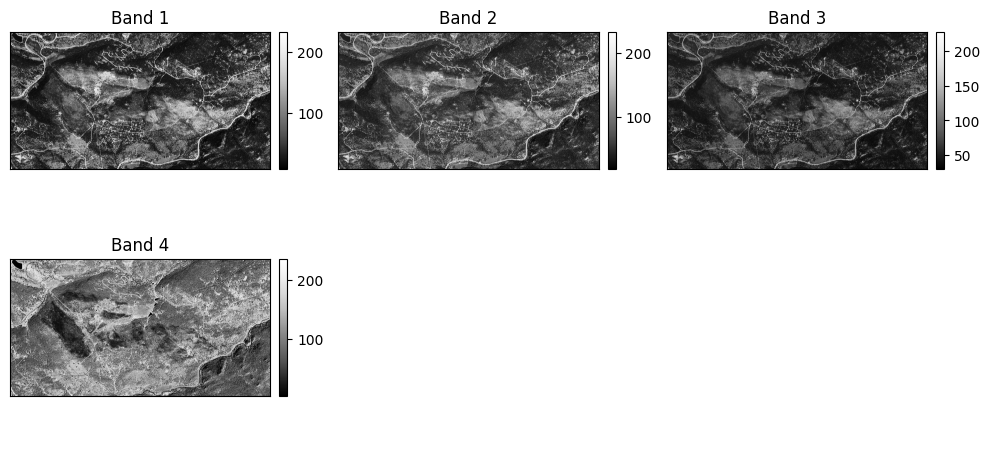

In [35]:
# plotting bands
ep.plot_bands(naip_post_fire, figsize=(10, 5))
plt.show()

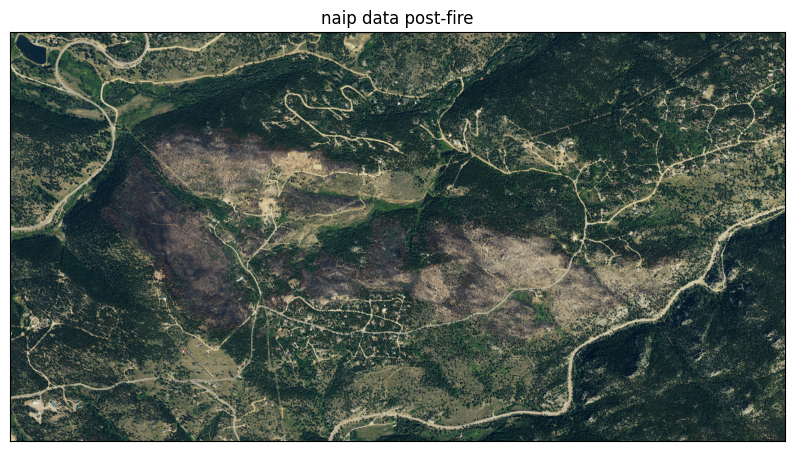

In [36]:
# ploting color image
ep.plot_rgb(naip_post_fire.values, title='naip data post-fire')
plt.show()